In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as  np
import matplotlib.pyplot as plt
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) #Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=10, metavar='N',
                    help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                    help='learning rate (default: 0.01)')
parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                    help='SGD momentum (default: 0.5)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')

parser.add_argument('--save-model', action='store_true', default=False,
                    help='For Saving the current Model')
class arg:
    def __init__(self):
        self.batch_size= 64
        self.test_batch_size= 1000
        self.epochs = 2
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = True
        self.seed = 42
        self.log_interval = 10
        self.save_model = True
args= arg()
    


In [3]:
use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))#给定均值和标准差
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
#moment）通过引入一个新的变量 v 去积累之前的梯度（通过指数衰减平均得到），得到加速学习过程的目的。

for epoch in range(1, args.epochs + 1):
    train(args, model, device, train_loader, optimizer, epoch)
    test(args, model, device, test_loader)

if (args.save_model):
    torch.save(model.state_dict(),"mnist_cnn.pt")



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309220
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.246165
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.187228
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.095065
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.913412
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.631691
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.260106
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.818625
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.721219
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.639697
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.545805
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.602220
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.404711
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.470617
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.316652
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.353487
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.412354
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.245503
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.294931
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.168844
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.007890
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.041299
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.099569
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.042829
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.073301
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.125005
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.042513
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.208839
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.188321
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.094078
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.125364
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.062559
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.136570
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.035366
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.038643
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.009318
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.083935
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.074104
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.032243
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.081518


In [4]:
 for data, target in train_loader:
        break

In [5]:
output = model(data)

In [6]:
data.shape

torch.Size([64, 1, 28, 28])

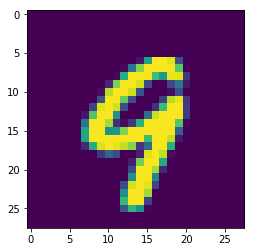

In [7]:
b=data[0][0]
b=b.reshape(1, 1, 28, 28)
plt.imshow(b[0][0])

In [9]:
output = model(b)
pred = output.argmax(dim=1, keepdim=True)
pred

tensor([[9]])

In [23]:
x = b
x = F.relu(model.conv1(x))
x.shape

torch.Size([1, 20, 24, 24])

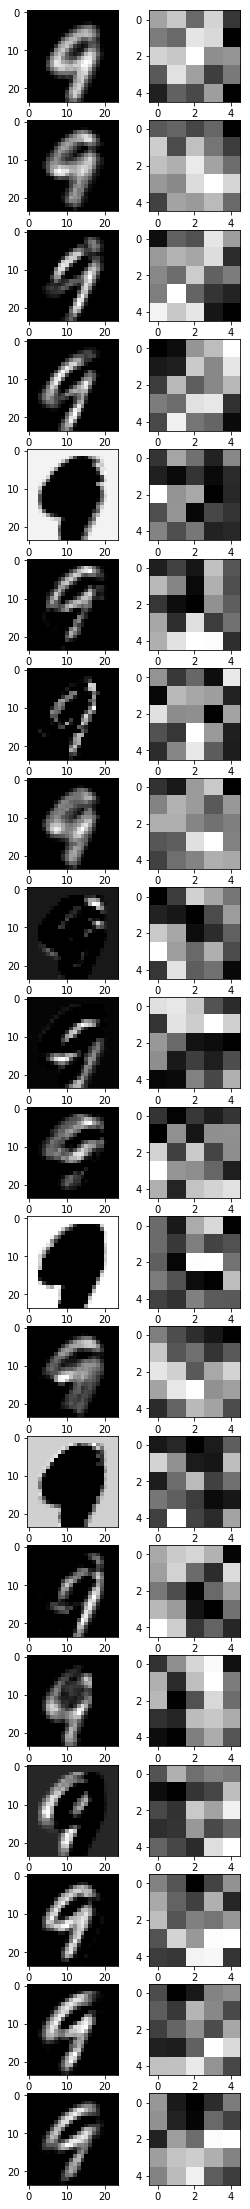

In [11]:
n1,n2,n3,n4 = x.shape
fig,axs = plt.subplots(nrows = n2, ncols = 2,figsize=(4,2*n2))
for (i,axi) in enumerate(axs[:,0]):
    axi.imshow(np.matrix(x[0][i].data.numpy()),cmap='gray')
for (i,axi) in enumerate(axs[:,1]):
    axi.imshow(np.matrix(model.conv1.weight.data.data[i].numpy()),cmap='gray')
plt.show()

In [24]:
x = F.max_pool2d(x, 2, 2)
x = F.relu(model.conv2(x))
x.shape

torch.Size([1, 50, 20, 20])

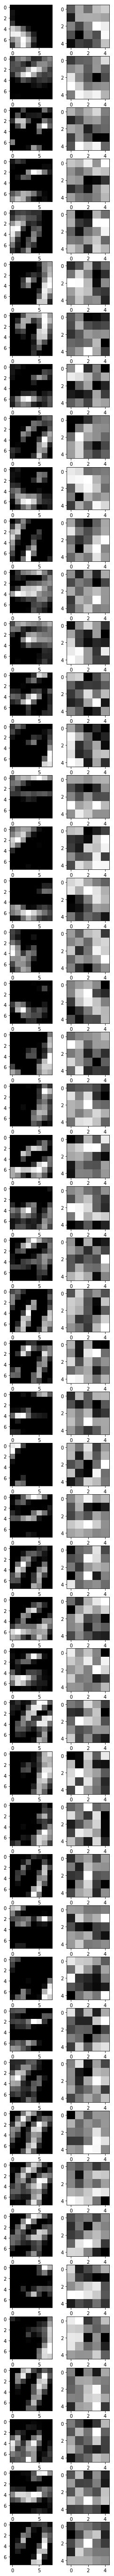

In [19]:
n1,n2,n3,n4 = x.shape
fig,axs = plt.subplots(nrows = n2, ncols = 2,figsize=(4,2*n2))
for (i,axi) in enumerate(axs[:,0]):
    axi.imshow(np.matrix(x[0][i].data.numpy()),cmap='gray')
for (i,axi) in enumerate(axs[:,1]):
    axi.imshow(np.matrix(model.conv2.weight.data.data[i].numpy()[0]),cmap='gray')
plt.show()

In [37]:
x = F.relu(model.conv1(b))
x = F.max_pool2d(x, 2, 2)
x = F.relu(model.conv2(x))
x = F.max_pool2d(x, 2, 2)
x = x.view(-1, 4*4*50)
x = F.relu(model.fc1(x))
x = model.fc2(x)
y = F.log_softmax(x, dim=1)


tensor([[-1.1071, -9.1743, -3.3233, -1.2702,  2.9894,  1.0990, -2.7832,  0.8262,
          0.9356, 11.7905]], grad_fn=<AddmmBackward>)

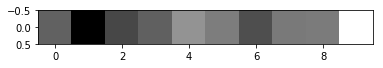

In [38]:
plt.imshow(x.data.numpy(),cmap='gray')
x

array([[2.5035176e-06, 7.8519441e-10, 2.7292884e-07, 2.1266437e-06,
        1.5053307e-04, 2.2732060e-05, 4.6839153e-07, 1.7305088e-05,
        1.9304320e-05, 9.9978447e-01]], dtype=float32)

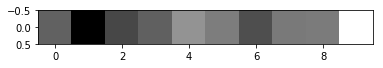

In [42]:
plt.imshow(y.data.numpy(),cmap='gray')
np.exp(y.data.numpy())